In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(f'X train shape: {x_train.shape}')
print(f'X test shape: {x_test.shape}')

print(f'Y train shape: {y_train.shape}')
print(f'Y test shape: {y_test.shape}')

X train shape: (50000, 32, 32, 3)
X test shape: (10000, 32, 32, 3)
Y train shape: (50000, 1)
Y test shape: (10000, 1)


In [3]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, ZeroPadding2D, Activation
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adadelta

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


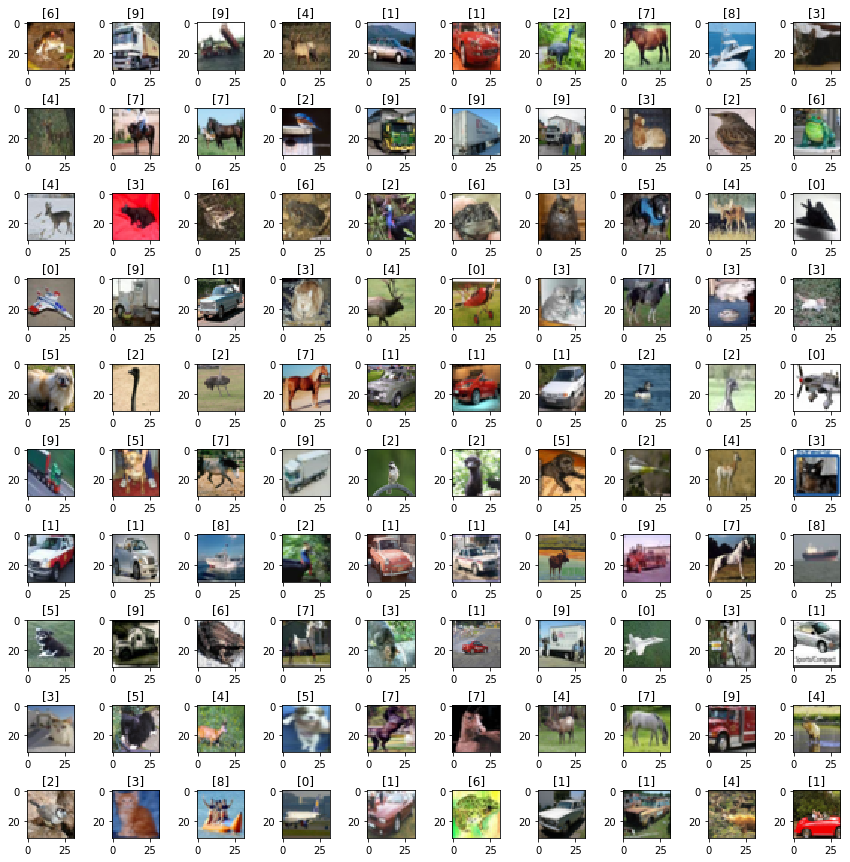

In [4]:
fig, ax = plt.subplots(nrows=10, ncols=10, figsize = (15,15))
ax = ax.ravel()

for i in range(0, 100):
    ax[i].imshow(x_train[i])
    ax[i].set_title(y_train[i])
    
plt.subplots_adjust(hspace=0.8)

In [5]:
num_of_classes = 10

y_train = to_categorical(y_train, num_of_classes)
y_test = to_categorical(y_test, num_of_classes)

In [6]:
l2_reg = 0

model = Sequential()

#1 CPR
model.add(Conv2D(96, (11,11), input_shape = x_train.shape[1:], padding='same', kernel_regularizer=l2(l2_reg)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#2 CPR

model.add(Conv2D(256, (5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#3 CPR
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#4 CPR
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(1024, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

#5 CPR
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(1024, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

# 1 FC

model.add(Dense(3072))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# 2 FC

model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# 3 FC

model.add(Dense(num_of_classes, activation='softmax'))
model.add(BatchNormalization())
model.add(Activation('softmax'))

print(model.summary())
model.compile(loss='categorical_crossentropy', optimizer = Adadelta(), metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 96)        34944     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 96)        384       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 256)       614656    
_________________________________________________________________
batch_normalization_2

In [7]:
batch_size = 35
epochs = 25

history = model.fit(x=x_train, y=y_train, epochs = epochs, batch_size=batch_size,verbose=1, validation_data=(x_test, y_test), shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)

print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/25


KeyboardInterrupt: 

In [ ]:
history_dict = history.history
print(history_dict.keys())

In [ ]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs_as_list = range(1, len(loss_values) +1)

print(type(epochs_as_list))

plt.style.use('seaborn-darkgrid')

train_loss_line = plt.plot(epochs_as_list, loss_values, label = 'Train loss' )
test_loss_line = plt.plot(epochs_as_list, val_loss_values, label = 'Validation/Test loss' )

plt.setp(train_loss_line, linewidth = 2.0, marker ='*', markersize = 5.0)
plt.setp(test_loss_line, linewidth = 2.0, marker ='*', markersize = 5.0)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

train_acc_line = plt.plot(epochs_as_list, acc_values, label='Train accuracy')
test_acc_line = plt.plot(epochs_as_list, val_acc_values, label='Test accuracy')

plt.setp(train_acc_line, linewidth = 2.0, marker = '*', markersize =5.0)
plt.setp(test_acc_line, linewidth=2.0, marker= '*', markersize = 5.0)


plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

y_pred = model.predict_classes(x_test)

print(classification_report(np.argmax(y_test, axis=1), y_pred))

In [ ]:
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred) # np.argmax because our labels were one hot encoded
plt.figure(figsize = (20,10))
sns.heatmap(cm, annot=True)